In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
df = pd.read_csv(r"C:\Users\dhrit\Downloads\mushrooms.csv")
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w       

In [5]:
X = df.drop("class", axis=1)   # class = edible/poisonous
y = df["class"]

In [10]:
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [11]:
y = LabelEncoder().fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
model = CategoricalNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


In [16]:
y_pred = model.predict(X_test)



✅ Accuracy: 0.9458572600492207


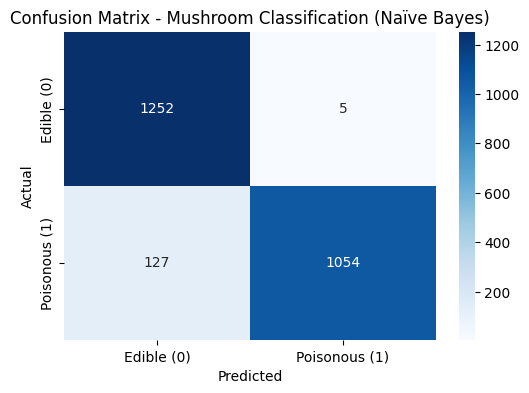


📑 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1257
           1       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [23]:
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = ["Edible (0)", "Poisonous (1)"]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Mushroom Classification (Naïve Bayes)")
plt.show()
print("\n📑 Classification Report:\n", classification_report(y_test, y_pred))


In [19]:
posterior_probs = model.predict_proba(X_test)
print("\nPosterior Probabilities (first 5 samples):\n", posterior_probs[:5])


Posterior Probabilities (first 5 samples):
 [[9.99992832e-01 7.16762681e-06]
 [2.33153001e-10 1.00000000e+00]
 [1.07554293e-11 1.00000000e+00]
 [9.99999984e-01 1.62861140e-08]
 [2.24076485e-10 1.00000000e+00]]


In [20]:
bayes_predictions = model.classes_[posterior_probs.argmax(axis=1)]
print("\nPredictions using Bayesian Decision Theory (first 10):\n", bayes_predictions[:10])



Predictions using Bayesian Decision Theory (first 10):
 [0 1 1 0 1 1 1 1 0 0]
